<a href="https://colab.research.google.com/github/AbhinavRudra/ML-Projects/blob/main/MNIST%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
cv2_imshow(X_train[0])
X_train[0].shape

(28, 28)

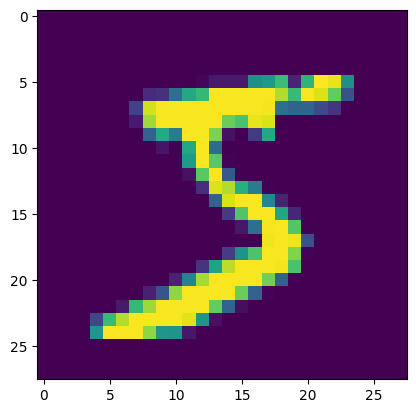

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(Y_train)

[5 0 4 ... 5 6 8]


In [ ]:
X_train,X_test = X_train/255,X_test/255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train model with early stopping
history = model.fit(X_train, y_train, epochs=50, validation_data = (X_test, y_test), callbacks=[early_stopping])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.fit(X_train,Y_train,epochs=20,validation_split=0.2,callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8674 - loss: 0.4384 - val_accuracy: 0.9635 - val_loss: 0.1192
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9674 - loss: 0.1049 - val_accuracy: 0.9665 - val_loss: 0.1098
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9798 - loss: 0.0659 - val_accuracy: 0.9650 - val_loss: 0.1164
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0511 - val_accuracy: 0.9715 - val_loss: 0.1024
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0407 - val_accuracy: 0.9727 - val_loss: 0.0963
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9902 - loss: 0.0295 - val_accuracy: 0.9735 - val_loss: 0.1024
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9760 - val_loss: 0.0979
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0238 -

In [ ]:
predicted = model.predict(X_test)
type(predicted)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


numpy.ndarray

In [ ]:
predicted_new = [np.argmax(i) for i in predicted]
predicted_new[0] , y_test[0]

(7, 7)

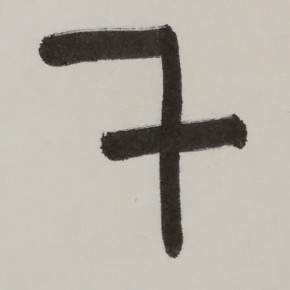

In [ ]:
image = cv2.imread('digit_test.jpg')
cv2_imshow(image)


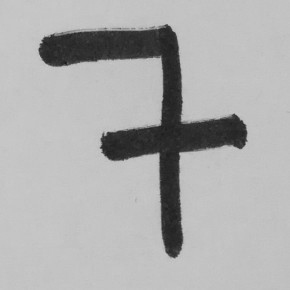

In [ ]:
#grey scale
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2_imshow(image)

In [ ]:
#resize
image = cv2.resize(image,(28,28))

In [ ]:
# normalise
image = image/255
print(image)

[[0.76862745 0.77254902 0.77254902 0.76862745 0.76862745 0.77647059
  0.77647059 0.77254902 0.76470588 0.77254902 0.76078431 0.77254902
  0.76862745 0.76470588 0.76078431 0.76078431 0.76078431 0.76078431
  0.76078431 0.76078431 0.76470588 0.76078431 0.76078431 0.76470588
  0.76078431 0.76078431 0.76078431 0.76078431]
 [0.77647059 0.77647059 0.77254902 0.76862745 0.77254902 0.77254902
  0.78039216 0.77254902 0.76078431 0.76078431 0.76470588 0.76862745
  0.76470588 0.76470588 0.76470588 0.75294118 0.76470588 0.76470588
  0.76862745 0.75686275 0.74901961 0.76078431 0.75686275 0.76078431
  0.76470588 0.76078431 0.75686275 0.76078431]
 [0.77254902 0.77647059 0.77647059 0.76862745 0.77254902 0.77254902
  0.76078431 0.76862745 0.76078431 0.75294118 0.75294118 0.74901961
  0.75294118 0.72941176 0.74509804 0.58823529 0.69803922 0.76078431
  0.75686275 0.76470588 0.76078431 0.76078431 0.75294118 0.76078431
  0.76470588 0.75294118 0.75686275 0.76078431]
 [0.77647059 0.77647059 0.77254902 0.768627

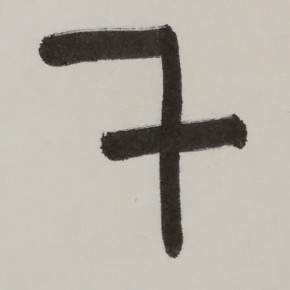

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted digit is: 7


In [ ]:
image_prev = cv2.imread('digit_test.jpg')
cv2_imshow(image_prev)
print(f"The predicted digit is: {np.argmax(model.predict(np.reshape(image ,[1,28,28])))}")